**Importing Important Libraries**

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score



**Reading data**

In [2]:
data_target=pd.read_csv("/content/CSUSHPISA.csv")

In [3]:
data_target.head()

,DATE,CSUSHPISA
0,1987-01-01,63.965
1,1987-02-01,64.424
2,1987-03-01,64.736
3,1987-04-01,65.132
4,1987-05-01,65.563


In [4]:
data_target.dtypes

DATE          object
CSUSHPISA    float64
dtype: object

In [5]:
data_target["DATE"] = pd.to_datetime(data_target["DATE"])


In [6]:
data_target

,DATE,CSUSHPISA
0,1987-01-01,63.965
1,1987-02-01,64.424
2,1987-03-01,64.736
3,1987-04-01,65.132
4,1987-05-01,65.563
...,...,...
436,2023-05-01,302.566
437,2023-06-01,304.593
438,2023-07-01,306.767
439,2023-08-01,309.155


**Retrieving relevent data**

In [7]:
mask = data_target["DATE"] >= "2001-07-01"
data_target = data_target[mask]

#Resetting Index
data_target.reset_index(inplace = True)
data_target.drop(columns = ["index"], inplace = True)

# Creating "Year" and "Month" columns
data_target["Year"] = pd.DatetimeIndex(data_target["DATE"]).year
data_target["Month"] = pd.DatetimeIndex(data_target["DATE"]).month
print(data_target.shape)
data_target.head()

(267, 4)


<ipython-input-7-daee693ed197>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_target.drop(columns = ["index"], inplace = True)
<ipython-input-7-daee693ed197>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_target["Year"] = pd.DatetimeIndex(data_target["DATE"]).year
<ipython-input-7-daee693ed197>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

,DATE,CSUSHPISA,Year,Month
0,2001-07-01,113.491,2001,7
1,2001-08-01,114.167,2001,8
2,2001-09-01,114.812,2001,9
3,2001-10-01,115.310,2001,10
4,2001-11-01,115.857,2001,11


In [8]:
data_target.tail()

,DATE,CSUSHPISA,Year,Month
262,2023-05-01,302.566,2023,5
263,2023-06-01,304.593,2023,6
264,2023-07-01,306.767,2023,7
265,2023-08-01,309.155,2023,8
266,2023-09-01,311.175,2023,9


**Unemployment rate Data**


In [9]:
data_umempolyment=pd.read_csv("/content/UNRATE.csv")

In [10]:
data_umempolyment.head()

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


In [11]:
data_umempolyment.tail()

,DATE,UNRATE
906,2023-07-01,3.5
907,2023-08-01,3.8
908,2023-09-01,3.8
909,2023-10-01,3.9
910,2023-11-01,3.7


In [12]:
mask = data_umempolyment["DATE"] >= "2001-07-01"
data_umempolyment = data_umempolyment[mask]

#Resetting Index
data_umempolyment.reset_index(inplace = True)
data_umempolyment.drop(columns = ["index"], inplace = True)

<ipython-input-12-98474f689acc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_umempolyment.drop(columns = ["index"], inplace = True)


In [13]:
data_umempolyment.head()

,DATE,UNRATE
0,2001-07-01,4.6
1,2001-08-01,4.9
2,2001-09-01,5.0
3,2001-10-01,5.3
4,2001-11-01,5.5


In [14]:
data_umempolyment.tail()

,DATE,UNRATE
264,2023-07-01,3.5
265,2023-08-01,3.8
266,2023-09-01,3.8
267,2023-10-01,3.9
268,2023-11-01,3.7


In [15]:
data_umempolyment.drop([267,268], inplace = True)

<ipython-input-15-acd3844ec5f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_umempolyment.drop([267,268], inplace = True)


In [16]:
data_umempolyment.tail()

,DATE,UNRATE
262,2023-05-01,3.7
263,2023-06-01,3.6
264,2023-07-01,3.5
265,2023-08-01,3.8
266,2023-09-01,3.8


**GDP data**


In [17]:
data_GDP=pd.read_csv("/content/A939RX0Q048SBEA.csv",names = ["DATE", "GDP"],skiprows=1)

In [18]:
data_GDP.head()

,DATE,GDP
0,2001-01-01,16637.00000
1,2001-02-01,16637.00000
2,2001-03-01,16637.00000
3,2001-04-01,16701.66667
4,2001-05-01,16701.66667


In [19]:
mask = data_GDP["DATE"] >= "2001-07-01"
data_GDP = data_GDP[mask]

#Resetting Index
data_GDP.reset_index(inplace = True)
data_GDP.drop(columns = ["index"], inplace = True)

In [20]:
data_GDP.head()

,DATE,GDP
0,2001-07-01,16591.33333
1,2001-08-01,16591.33333
2,2001-09-01,16591.33333
3,2001-10-01,16594.33333
4,2001-11-01,16594.33333


In [21]:
data_GDP.tail()

,DATE,GDP
262,2023-05-01,22113.66667
263,2023-06-01,22113.66667
264,2023-07-01,22361.00000
265,2023-08-01,22361.00000
266,2023-09-01,22361.00000


In [22]:
#data_GDP.drop([267,268], inplace = True)

In [23]:
data_GDP.dtypes

DATE     object
GDP     float64
dtype: object

In [24]:
data_GDP["DATE"] = pd.to_datetime(data_GDP["DATE"])

**CPI for U.S. data**

In [25]:
data_CPI=pd.read_csv("/content/MEDCPIM158SFRBCLE.csv",names = ["DATE", "CPI"],skiprows=1)

In [26]:
data_CPI.head()

,DATE,CPI
0,1983-01-01,5.014653
1,1983-02-01,4.952545
2,1983-03-01,3.612261
3,1983-04-01,4.828054
4,1983-05-01,3.767326


In [27]:
mask = data_CPI["DATE"] >= "2001-07-01"
data_CPI = data_CPI[mask]
data_CPI.reset_index(inplace = True)
data_CPI.drop(columns = ["index"], inplace = True)

In [28]:
data_CPI.head()

,DATE,CPI
0,2001-07-01,2.435041
1,2001-08-01,3.805443
2,2001-09-01,2.782508
3,2001-10-01,4.184077
4,2001-11-01,3.443171


In [29]:
data_CPI.tail()

,DATE,CPI
264,2023-07-01,2.283639
265,2023-08-01,4.027318
266,2023-09-01,5.626580
267,2023-10-01,3.881948
268,2023-11-01,5.340107


In [30]:
data_CPI.drop([267,268], inplace = True)

**Interest** **Rate** **data**

In [31]:
Data_Interest=pd.read_csv("/content/REAINTRATREARAT10Y.csv",names = ["DATE", "Interest"],skiprows=1)

In [32]:
Data_Interest.head()

,DATE,Interest
0,1982-01-01,7.623742
1,1982-02-01,7.656648
2,1982-03-01,7.128993
3,1982-04-01,7.408347
4,1982-05-01,7.320041


In [33]:
Data_Interest.tail()

,DATE,Interest
499,2023-08-01,1.602095
500,2023-09-01,1.699708
501,2023-10-01,2.082461
502,2023-11-01,2.094329
503,2023-12-01,1.675015


In [34]:
mask = Data_Interest["DATE"] >= "2001-07-01"
Data_Interest = Data_Interest[mask]
Data_Interest.reset_index(inplace = True)
Data_Interest.drop(columns = ["index"], inplace = True)

In [35]:
Data_Interest.drop([267,268,269], inplace = True)

In [36]:
Data_Interest.tail()

,DATE,Interest
262,2023-05-01,1.536904
263,2023-06-01,1.060631
264,2023-07-01,1.426047
265,2023-08-01,1.602095
266,2023-09-01,1.699708


 **working Population Data**

In [37]:
data_Working=pd.read_csv("/content/LFWA64TTUSM647S.csv",names = ["DATE", "Working Population"],skiprows=1)

In [38]:
data_Working.tail()

,DATE,Working Population
557,2023-06-01,2.087069e+08
558,2023-07-01,2.087792e+08
559,2023-08-01,2.089066e+08
560,2023-09-01,2.091172e+08
561,2023-10-01,2.090394e+08


In [39]:
mask = data_Working["DATE"] >= "2001-07-01"
data_Working = data_Working[mask]
data_Working.reset_index(inplace = True)
data_Working.drop(columns = ["index"], inplace = True)

In [40]:
data_Working.head()

,DATE,Working Population
0,2001-07-01,1.816143e+08
1,2001-08-01,1.818285e+08
2,2001-09-01,1.820565e+08
3,2001-10-01,1.822366e+08
4,2001-11-01,1.824306e+08


In [41]:
data_Working.tail()

,DATE,Working Population
263,2023-06-01,2.087069e+08
264,2023-07-01,2.087792e+08
265,2023-08-01,2.089066e+08
266,2023-09-01,2.091172e+08
267,2023-10-01,2.090394e+08


In [42]:
data_Working.drop([267], inplace = True)

**housing subsidies data**

In [43]:
data_subsidies=pd.read_csv("/content/L312051A027NBEA.csv",names = ["DATE", "Housing subsidies"],skiprows=1)

In [44]:
data_subsidies.head(18)

,DATE,Housing subsidies
0,2001-01-01,1.714417
1,2001-02-01,1.714417
2,2001-03-01,1.714417
3,2001-04-01,1.714417
4,2001-05-01,1.714417
5,2001-06-01,1.714417
6,2001-07-01,1.714417
7,2001-08-01,1.714417
8,2001-09-01,1.714417
9,2001-10-01,1.714417


In [45]:
mask = data_subsidies["DATE"] >= "2001-07-01"
data_subsidies =data_subsidies[mask]
data_subsidies.reset_index(inplace = True)
data_subsidies.drop(columns = ["index"], inplace = True)

In [46]:
data_subsidies.tail()

,DATE,Housing subsidies
253,2022-08-01,4.00175
254,2022-09-01,4.00175
255,2022-10-01,4.00175
256,2022-11-01,4.00175
257,2022-12-01,4.00175


In [47]:
data_subsidies.dtypes

DATE                  object
Housing subsidies    float64
dtype: object

In [48]:
data_subsidies["DATE"] = pd.to_datetime(data_subsidies["DATE"])

In [49]:
data_subsidies.head()

,DATE,Housing subsidies
0,2001-07-01,1.714417
1,2001-08-01,1.714417
2,2001-09-01,1.714417
3,2001-10-01,1.714417
4,2001-11-01,1.714417


In [50]:
data_subsidies.tail()

,DATE,Housing subsidies
253,2022-08-01,4.00175
254,2022-09-01,4.00175
255,2022-10-01,4.00175
256,2022-11-01,4.00175
257,2022-12-01,4.00175


**Personal Income data**'


In [51]:
Personal_Income=pd.read_csv('/content/PI.csv',names=["DATE","Personal,Income"],skiprows=1)

In [52]:
Personal_Income.head()

,DATE,"Personal,Income"
0,2001-07-01,9014.6
1,2001-08-01,9001.4
2,2001-09-01,8975.3
3,2001-10-01,8987.3
4,2001-11-01,8985.1


In [53]:
Personal_Income.dtypes

DATE                object
Personal,Income    float64
dtype: object

In [54]:
Personal_Income["DATE"] = pd.to_datetime(Personal_Income["DATE"])

In [56]:
Personal_Income.tail()

,DATE,"Personal,Income"
262,2023-05-01,22876.6
263,2023-06-01,22921.4
264,2023-07-01,22984.0
265,2023-08-01,23089.1
266,2023-09-01,23185.9


**Urban Population data**

In [57]:
Urban_population=pd.read_excel("/content/US Urban POPulation.xlsx",names=["DATE","Urban Population"],skiprows=1)

In [58]:
Urban_population.head()

,DATE,Urban Population
0,2000-02-01,223069137
1,2000-03-01,223069137
2,2000-04-01,223069137
3,2000-05-01,223069137
4,2000-06-01,223069137


In [59]:
mask =Urban_population["DATE"] >= "2001-07-01"
Urban_population=Urban_population[mask]
Urban_population.reset_index(inplace = True)
Urban_population.drop(columns = ["index"], inplace = True)

<ipython-input-59-97e92cf8ca57>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Urban_population.drop(columns = ["index"], inplace = True)


In [60]:
Urban_population.tail()

,DATE,Urban Population
253,2022-08-01,276908634
254,2022-09-01,276908634
255,2022-10-01,276908634
256,2022-11-01,276908634
257,2022-12-01,276908634


**Construction Price data**

In [61]:
Construction_price=pd.read_csv("/content/WPUSI012011 (1).csv",names=["DATE","CONS PRICE"],skiprows=1)

In [62]:
Construction_price.head()

,DATE,CONS PRICE
0,1947-01-01,22.2
1,1947-02-01,22.5
2,1947-03-01,22.9
3,1947-04-01,23.2
4,1947-05-01,23.3


In [63]:
mask =Construction_price["DATE"] >= "2001-07-01"
Construction_price=Construction_price[mask]
Construction_price.reset_index(inplace = True)
Construction_price.drop(columns = ["index"], inplace = True)

In [64]:
Construction_price.head()

,DATE,CONS PRICE
0,2001-07-01,143.4
1,2001-08-01,143.3
2,2001-09-01,143.0
3,2001-10-01,142.3
4,2001-11-01,142.1


In [65]:
Construction_price.tail()

,DATE,CONS PRICE
264,2023-07-01,334.512
265,2023-08-01,333.786
266,2023-09-01,332.084
267,2023-10-01,328.721
268,2023-11-01,327.242


In [66]:
Construction_price.drop([267,268], inplace = True)

**Merging data**

In [67]:
df = pd.DataFrame()
df_bymonth = [data_target,data_umempolyment,data_GDP, data_CPI,Data_Interest,data_Working,data_subsidies,Personal_Income,Urban_population,Construction_price]
for df1 in df_bymonth:
    df1["DATE"] = pd.to_datetime(df1["DATE"])
    df1 = df1.set_index("DATE")
    df = pd.concat([df,df1], axis = 1)
print(df.shape)
df.head()

<ipython-input-67-c2952d0f3aae>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["DATE"] = pd.to_datetime(df1["DATE"])
<ipython-input-67-c2952d0f3aae>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["DATE"] = pd.to_datetime(df1["DATE"])


(267, 12)


,CSUSHPISA,Year,Month,UNRATE,GDP,CPI,Interest,Working Population,Housing subsidies,"Personal,Income",Urban Population,CONS PRICE
DATE,,,,,,,,,,,,
2001-07-01,113.491,2001,7,4.6,16591.33333,2.435041,2.528367,1.816143e+08,1.714417,9014.6,225792302.0,143.4
2001-08-01,114.167,2001,8,4.9,16591.33333,3.805443,2.334361,1.818285e+08,1.714417,9001.4,225792302.0,143.3
2001-09-01,114.812,2001,9,5.0,16591.33333,2.782508,2.177768,1.820565e+08,1.714417,8975.3,225792302.0,143.0
2001-10-01,115.310,2001,10,5.3,16594.33333,4.184077,1.986932,1.822366e+08,1.714417,8987.3,225792302.0,142.3
2001-11-01,115.857,2001,11,5.5,16594.33333,3.443171,1.814766,1.824306e+08,1.714417,8985.1,225792302.0,142.1


In [68]:
df.tail()

,CSUSHPISA,Year,Month,UNRATE,GDP,CPI,Interest,Working Population,Housing subsidies,"Personal,Income",Urban Population,CONS PRICE
DATE,,,,,,,,,,,,
2023-05-01,302.566,2023,5,3.7,22113.66667,4.655686,1.536904,2.086128e+08,NaN,22876.6,NaN,337.473
2023-06-01,304.593,2023,6,3.6,22113.66667,4.355447,1.060631,2.087069e+08,NaN,22921.4,NaN,337.336
2023-07-01,306.767,2023,7,3.5,22361.00000,2.283639,1.426047,2.087792e+08,NaN,22984.0,NaN,334.512
2023-08-01,309.155,2023,8,3.8,22361.00000,4.027318,1.602095,2.089066e+08,NaN,23089.1,NaN,333.786
2023-09-01,311.175,2023,9,3.8,22361.00000,5.626580,1.699708,2.091172e+08,NaN,23185.9,NaN,332.084


**data Cleaning**

In [69]:
df.shape

(267, 12)

Finding Null Values

In [70]:
df.isnull().sum()

CSUSHPISA             0
Year                  0
Month                 0
UNRATE                0
GDP                   0
CPI                   0
Interest              0
Working Population    0
Housing subsidies     9
Personal,Income       0
Urban Population      9
CONS PRICE            0
dtype: int64

In [71]:
df.dropna(inplace=True)

In [72]:
df.shape

(258, 12)

Dropping Duplicates

In [73]:
df=df.drop_duplicates()

In [74]:
df.shape

(258, 12)

Checking data types

In [75]:
df.dtypes

CSUSHPISA             float64
Year                    int64
Month                   int64
UNRATE                float64
GDP                   float64
CPI                   float64
Interest              float64
Working Population    float64
Housing subsidies     float64
Personal,Income       float64
Urban Population      float64
CONS PRICE            float64
dtype: object

Checking outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x7aa546c28d00>,
 'caps': [<matplotlib.lines.Line2D at 0x7aa546c28880>,
 'boxes': [<matplotlib.lines.Line2D at 0x7aa546c29bd0>,
 'medians': [<matplotlib.lines.Line2D at 0x7aa546c2a1a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7aa546c2a440>,
 'means': []}

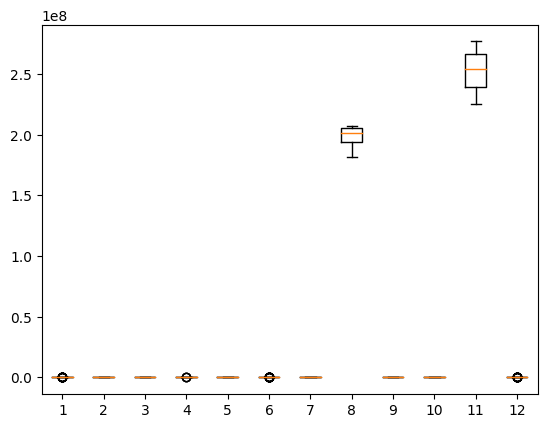

In [76]:
plt.boxplot(df)

Dropping unwanted data

In [77]:
df.drop(columns = ["Year", "Month"], inplace = True)

Getting foinal dataset

In [78]:

df.to_csv("Final_dataset.csv")

In [82]:
df.columns

Index(['UNRATE', 'GDP', 'CPI', 'Interest', 'Working Population',
       'Housing subsidies', 'Personal,Income', 'Urban Population',
       'CONS PRICE'],
      dtype='object')